<a href="https://colab.research.google.com/github/renuchaurasia/renu_INFO5731_Spring2023/blob/main/In_class_exercise/In_class_exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Read Text Files with Pandas using read_csv()

# importing pandas
import pandas as pd

# read text file into pandas DataFrame
df_train = pd.read_fwf("C:\\Users\\RenuChaurasia\\OneDrive - UNT System\\LeetCode\\program\\src\\python\\info5731\\exercise05_datacollection\\exercise09_datacollection\\stsa-train.txt", sep=" ")
df_train.columns = ["Sentiment", "Review", "Comment"]
# display DataFrame
print(df_train)


      Sentiment                                             Review Comment
0             0  apparently reassembled from the cutting-room f...     NaN
1             0  they presume their audience wo n't sit still f...     NaN
2             1  this is a visually stunning rumination on love...     NaN
3             1  jonathan parker 's bartleby should have been t...     NaN
4             1  campanella gets the tone just right -- funny i...     NaN
...         ...                                                ...     ...
6914          1  painful , horrifying and oppressively tragic ,...     NaN
6915          0  take care is nicely performed by a quintet of ...     NaN
6916          0  the script covers huge , heavy topics in a bla...     NaN
6917          0  a seriously bad film with seriously warped log...     NaN
6918          1  a deliciously nonsensical comedy about a city ...     NaN

[6919 rows x 3 columns]


In [ ]:
# read text file into pandas DataFrame
df_test = pd.read_fwf("C:\\Users\\RenuChaurasia\\OneDrive - UNT System\\LeetCode\\program\\src\\python\\info5731\\exercise05_datacollection\\exercise09_datacollection\\stsa-test.txt", sep=" ")
df_test.columns = ["Sentiment", "Review", "Comments","Comments2"]
# display DataFrame
df_test.head()

,Sentiment,Review,Comments,Comments2
0,0,"a gob of drivel so sickly sweet , even the eag...",NaN,NaN
1,0,"gangs of new york is an unapologetic mess , wh...",NaN,NaN
2,0,"we never really feel involved with the story ,...",NaN,NaN
3,1,this is one of polanski 's best films .,NaN,NaN
4,1,take care of my cat offers a refreshingly diff...,NaN,NaN


In [ ]:
# Write your code here

X_trainval = df_train['Review']
y_trainval = df_train['Sentiment']
X_test = df_test['Review']
y_test = df_test['Sentiment']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


In [ ]:

# Convert text data into numerical features
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(X_train)


In [ ]:
# Train a MultinomialNB classifier on the training data with 10-fold cross-validation
nb_clf = MultinomialNB()
scores = cross_val_score(nb_clf, train_vectors, y_train, cv=10)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.76714801 0.8032491  0.7833935  0.78519856 0.77797834 0.77396022
 0.78119349 0.76672694 0.78842676 0.78661844]
Mean cross-validation score: 0.7813893367976446


In [ ]:
# Train the final model on the entire training set
nb_clf.fit(train_vectors, y_train)
# Convert the validation and test data to vectors using the same CountVectorizer
val_vectors = vectorizer.transform(X_val)
test_vectors = vectorizer.transform(X_test)

# Use the trained classifier to predict labels for the validation and test data
val_predictions = nb_clf.predict(val_vectors)
test_predictions = nb_clf.predict(test_vectors)

In [ ]:
# Make predictions on the test data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the performance of the classifier on the validation and test data

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

val_recall = recall_score(y_val, val_predictions)
test_recall = recall_score(y_test, test_predictions)
print("Validation recall:", val_recall)
print("Test recall:", test_recall)

val_precision = precision_score(y_val, val_predictions)
test_precision = precision_score(y_test, test_predictions)
print("Validation precision:", val_precision)
print("Test precision:", test_precision)

val_f1 = f1_score(y_val, val_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Validation f1 score:", val_f1)
print("Test f1 score:", test_f1)


Validation accuracy: 0.7174855491329479
Test accuracy: 0.7335164835164835
Validation recall: 0.7387140902872777
Test recall: 0.7557755775577558
Validation precision: 0.7297297297297297
Test precision: 0.7231578947368421
Validation f1 score: 0.7341944255608431
Test f1 score: 0.7391070467993545


In [ ]:
#SVM

from sklearn.model_selection import cross_val_score
svm_clf = svm.SVC(kernel='linear', C=1, random_state=42)
svm_scores = cross_val_score(svm_clf, train_vectors, y_train, cv=10)
print("Cross-validation scores:", svm_scores)
print("Mean cross-validation score:", svm_scores.mean())

Cross-validation scores: [0.75451264 0.75812274 0.75090253 0.74909747 0.76895307 0.73960217
 0.76853526 0.75045208 0.7721519  0.7721519 ]
Mean cross-validation score: 0.7584481756875853


In [ ]:
# Convert the validation and test data to vectors using the same CountVectorizer
val_vectors = vectorizer.transform(X_val)
test_vectors = vectorizer.transform(X_test)

In [ ]:
# Train the final model on the entire training set
svm_clf.fit(train_vectors, y_train)


# Use the trained classifier to predict labels for the validation and test data
val_predictions = svm_clf.predict(val_vectors)
test_predictions = svm_clf.predict(test_vectors)

# Evaluate the performance of the classifier on the validation and test data

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

val_recall = recall_score(y_val, val_predictions)
test_recall = recall_score(y_test, test_predictions)
print("Validation recall:", val_recall)
print("Test recall:", test_recall)

val_precision = precision_score(y_val, val_predictions)
test_precision = precision_score(y_test, test_predictions)
print("Validation precision:", val_precision)
print("Test precision:", test_precision)

val_f1 = f1_score(y_val, val_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Validation f1 score:", val_f1)
print("Test f1 score:", test_f1)


Validation accuracy: 0.759393063583815
Test accuracy: 0.765934065934066
Validation recall: 0.7838577291381669
Test recall: 0.7733773377337734
Validation precision: 0.766042780748663
Test precision: 0.761646803900325
Validation f1 score: 0.7748478701825557
Test f1 score: 0.767467248908297


In [ ]:
#KNN

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#create a new KNN model
knn_clf = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
knn_scores = cross_val_score(knn_clf, train_vectors, y_train, cv=5)
#print each cv score (accuracy) and average them

print("Cross-validation scores:", knn_scores)
print("Mean cross-validation score:", knn_scores.mean())


Cross-validation scores: [0.53116531 0.54742547 0.57091238 0.5564589  0.55826558]
Mean cross-validation score: 0.5528455284552846


In [ ]:
# Train the final model on the entire training set
knn_clf.fit(train_vectors, y_train)


# Use the trained classifier to predict labels for the validation and test data
val_predictions = knn_clf.predict(val_vectors)
test_predictions = knn_clf.predict(test_vectors)

# Evaluate the performance of the classifier on the validation and test data

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

val_recall = recall_score(y_val, val_predictions)
test_recall = recall_score(y_test, test_predictions)
print("Validation recall:", val_recall)
print("Test recall:", test_recall)

val_precision = precision_score(y_val, val_predictions)
test_precision = precision_score(y_test, test_predictions)
print("Validation precision:", val_precision)
print("Test precision:", test_precision)

val_f1 = f1_score(y_val, val_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Validation f1 score:", val_f1)
print("Test f1 score:", test_f1)

Validation accuracy: 0.5794797687861272
Test accuracy: 0.5758241758241758
Validation recall: 0.5444596443228454
Test recall: 0.5621562156215621
Validation precision: 0.615146831530139
Test precision: 0.5774011299435028
Validation f1 score: 0.5776487663280117
Test f1 score: 0.5696767001114826


In [ ]:
#  Decision tree

from sklearn.tree import DecisionTreeClassifier


# Train Decision Tree with 10-fold cross-validation
dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, train_vectors, y_train, cv=10, scoring='accuracy')

dt_clf.fit(train_vectors, y_train)
# Use the trained classifier to predict labels for the validation and test data
val_predictions = dt_clf.predict(val_vectors)
test_predictions = dt_clf.predict(test_vectors)

# Evaluate the performance of the classifier on the validation and test data

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

val_recall = recall_score(y_val, val_predictions)
test_recall = recall_score(y_test, test_predictions)
print("Validation recall:", val_recall)
print("Test recall:", test_recall)

val_precision = precision_score(y_val, val_predictions)
test_precision = precision_score(y_test, test_predictions)
print("Validation precision:", val_precision)
print("Test precision:", test_precision)

val_f1 = f1_score(y_val, val_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Validation f1 score:", val_f1)
print("Test f1 score:", test_f1)


Validation accuracy: 0.6358381502890174
Test accuracy: 0.6445054945054945
Validation recall: 0.6757865937072504
Test recall: 0.6578657865786579
Validation precision: 0.6491458607095927
Test precision: 0.6402569593147751
Validation f1 score: 0.6621983914209115
Test f1 score: 0.6489419424850787


In [ ]:
# Random Forest

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf_clf =RandomForestClassifier()
# Train the model on training data
rf_clf.fit(train_vectors, y_train)


# Use the trained classifier to predict labels for the validation and test data
val_predictions = rf_clf.predict(val_vectors)
test_predictions = rf_clf.predict(test_vectors)

# Evaluate the performance of the classifier on the validation and test data

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

val_recall = recall_score(y_val, val_predictions)
test_recall = recall_score(y_test, test_predictions)
print("Validation recall:", val_recall)
print("Test recall:", test_recall)

val_precision = precision_score(y_val, val_predictions)
test_precision = precision_score(y_test, test_predictions)
print("Validation precision:", val_precision)
print("Test precision:", test_precision)

val_f1 = f1_score(y_val, val_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Validation f1 score:", val_f1)
print("Test f1 score:", test_f1)


Validation accuracy: 0.736271676300578
Test accuracy: 0.7274725274725274
Validation recall: 0.7783857729138167
Test recall: 0.759075907590759
Validation precision: 0.7370466321243523
Test precision: 0.7135470527404343
Validation f1 score: 0.7571523619427811
Test f1 score: 0.7356076759061834


In [ ]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# XGBoost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(train_vectors, y_train)


# Use the trained classifier to predict labels for the validation and test data
val_predictions = xgb_clf.predict(val_vectors)
test_predictions = xgb_clf.predict(test_vectors)

# Evaluate the performance of the classifier on the validation and test data

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Validation accuracy:", val_accuracy)
print("Test accuracy:", test_accuracy)

val_recall = recall_score(y_val, val_predictions)
test_recall = recall_score(y_test, test_predictions)
print("Validation recall:", val_recall)
print("Test recall:", test_recall)

val_precision = precision_score(y_val, val_predictions)
test_precision = precision_score(y_test, test_predictions)
print("Validation precision:", val_precision)
print("Test precision:", test_precision)

val_f1 = f1_score(y_val, val_predictions)
test_f1 = f1_score(y_test, test_predictions)
print("Validation f1 score:", val_f1)
print("Test f1 score:", test_f1)

Validation accuracy: 0.7174855491329479
Test accuracy: 0.7335164835164835
Validation recall: 0.7387140902872777
Test recall: 0.7557755775577558
Validation precision: 0.7297297297297297
Test precision: 0.7231578947368421
Validation f1 score: 0.7341944255608431
Test f1 score: 0.7391070467993545


In [ ]:
# Word2Vec

from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
# Preprocess the data
corpus = df_train['Review'].tolist()

# Tokenize the corpus
tokenized_corpus = [doc.split(" ") for doc in corpus]

# Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, min_count=1)

# Transform each document to a vector representation using Word2Vec
X = []
for doc in tokenized_corpus:
    doc_vec = np.zeros(100)
    count = 0
    for word in doc:
        try:
            doc_vec += model.wv[word]
            count += 1
        except:
            pass
    if count != 0:
        doc_vec /= count
    X.append(doc_vec)

X = np.array(X)

# Encode the labels
encoder = LabelEncoder()
encoder.fit(df_train['Sentiment'])
encoded_Y = encoder.transform(df_train['Sentiment'])
y = np_utils.to_categorical(encoded_Y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/50
173/173 [==============================] - 1s 3ms/step - loss: 0.6971 - accuracy: 0.5050 - val_loss: 0.6946 - val_accuracy: 0.5036
Epoch 2/50
173/173 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5154 - val_loss: 0.6961 - val_accuracy: 0.5036
Epoch 3/50
173/173 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5239 - val_loss: 0.6934 - val_accuracy: 0.5036
Epoch 4/50
173/173 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6935 - val_accuracy: 0.5036
Epoch 5/50
173/173 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5241 - val_loss: 0.6930 - val_accuracy: 0.5036
Epoch 6/50
173/173 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5207 - val_loss: 0.6937 - val_accuracy: 0.5036
Epoch 7/50
173/173 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5232 - val_loss: 0.6943 - val_accuracy: 0.5036
Epoch 

In [ ]:
pip install tensorflow_text

     ---------------------------------------- 5.0/5.0 MB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# BERT


import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, TFBertModel

# Preprocess the data
corpus = df_train['Review'].tolist()
labels = df_train['Sentiment'].tolist()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, test_size=0.2)

# Load the BERT model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input text
train_tokens = tokenizer.batch_encode_plus(
    X_train,
    max_length = 128,
    padding = 'max_length',
    truncation = True,
    return_token_type_ids=False
)

test_tokens = tokenizer.batch_encode_plus(
    X_test,
    max_length = 128,
    padding = 'max_length',
    truncation = True,
    return_token_type_ids=False
)

# Convert the tokens to TensorFlow tensors
train_tf_input = (
    tf.constant(train_tokens['input_ids']),
    tf.constant(train_tokens['attention_mask']),
    tf.constant(y_train)
)

test_tf_input = (
    tf.constant(test_tokens['input_ids']),
    tf.constant(test_tokens['attention_mask']),
    tf.constant(y_test)
)

# Define the BERT model
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32)
bert_output = bert_model({'input_ids': input_ids, 'attention_mask': attention_mask})[1]
dropout = tf.keras.layers.Dropout(0.2)(bert_output)
outputs = tf.keras.layers.Dense(len(set(labels)), activation='softmax')(dropout)
model = tf.keras.models.Model(inputs=[input_ids, attention_mask], outputs=outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_tf_input, epochs=10, batch_size=32,
                    validation_data=test_tf_input)

# Evaluate the model
y_pred = np.argmax(model.predict(test_tf_input), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
#Write your code here.

# read text file into pandas DataFrame
df_amzn = pd.read_csv("Amazon_Unlocked_Mobile.csv")

# display DataFrame
print(df_amzn)



                                             Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                         

c:\Users\RenuChaurasia\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rating', ylabel='count'>

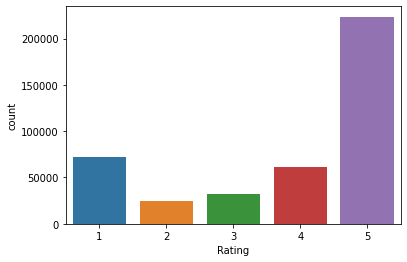

In [ ]:
# Understand how customer ratings are distributed
import seaborn as sns
sns.countplot(df_amzn.Rating)

In [ ]:
#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = df_amzn['Rating']
positiveNegative = actualScore.map(partition) 
df_amzn['Rating'] = positiveNegative

In [ ]:
df_amzn.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [ ]:
df_amzn["Rating"].value_counts()

positive    316762
negative     97078
Name: Rating, dtype: int64

In [ ]:

final=df_amzn.drop_duplicates(subset={"Product Name","Rating","Reviews","Price"}, keep='first', inplace=False)
final.shape

(336677, 6)

In [ ]:
data_pos = final[final["Rating"] == "positive"]
data_neg = final[final["Rating"] == "negative"]
final = pd.concat([data_pos, data_neg])
score =final["Rating"]
final.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [ ]:
final = final.dropna()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['Reviews'].values)
bow.shape

(278255, 62853)

In [ ]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()
terms[1:10]

['000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000000000',
 '0000from',
 '0001',
 '0004']

In [ ]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [ ]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [ ]:
cluster_center

array([[8.39858706e-04, 1.23508633e-05, 0.00000000e+00, ...,
        6.17543166e-06, 0.00000000e+00, 6.17543166e-06],
       [3.38242062e-02, 6.90289922e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33791925e-02, 2.24799928e-03, 3.59679885e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.99348534e-02, 7.16612378e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
i=0
list_of_sent=[]
for sent in final['Reviews'].values:
    list_of_sent.append(sent.split())

In [ ]:
print(final['Reviews'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
*****************************************************************
['I', 'feel', 'so', 'LUCKY', 'to', 'have', 'found', 'this', 'used', '(phone', 'to', 'us', '&', 'not', 'used', 'hard', 'at', 'all),', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one.', 'My', 'Son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', '2.5+', 'years', 'and', "didn't", 'want', 'an', 'upgrade!!', 'Thank', 'you', 'Seller,', 'we', 'really', 'appreciate', 'it', '&', 'your', 'honesty', 're:', 'said', 'used', 'phone.I', 'recommend', 'this', 'seller', 'very', 'highly', '&', 'would', '

In [ ]:
i=0
list_of_sent_train=[]
for sent in final['Reviews'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [ ]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train, workers=4)

In [ ]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

c:\Users\RenuChaurasia\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(278255, 100)

In [ ]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 

In [ ]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(n_clusters=9)

In [ ]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [ ]:
word_cluster_center[1:2]

array([[-0.5706813 , -0.49902229,  0.05172537, -0.29230335, -0.27650186,
         0.16437484, -0.44766987, -0.27226919,  0.11549864,  0.24196486,
         0.19906273,  0.36722626, -0.27633084, -0.29177358, -0.32519292,
         0.11995747, -0.05667634,  1.04522652,  0.63649435,  0.44707405,
        -0.16407088, -0.08538789, -0.26048373,  0.71929574,  0.44749549,
        -0.28665678,  0.7132712 ,  0.28665266,  0.30381644,  0.13161832,
        -0.20834765, -0.34541565,  0.18868703,  0.65218866, -0.23441523,
         0.13472996,  0.2683659 , -0.07446211,  0.24368691,  0.58708295,
         0.22752427, -0.02028882, -0.03079049,  0.17582125, -0.37734302,
         0.07683343,  0.13139973, -0.1460146 ,  0.12568788, -0.62082482,
         0.53693111, -0.14836564,  0.31280875, -0.25203315, -0.14461011,
         0.03707706, -0.37312035, -0.44971635,  0.0555543 , -0.12987089,
        -0.24809946,  0.39754658,  0.34319375,  0.61046568, -0.15491831,
        -0.68954717, -0.15035784,  0.41555939, -0.3

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

K-means, DBSCAN, and hierarchical clustering are unsupervised clustering algorithms that are commonly used for grouping similar data points together based on their feature similarities. K-means is a centroid-based algorithm that aims to minimize the variance of clusters by assigning each data point to the nearest centroid. DBSCAN is a density-based algorithm that groups together points that are closely packed together and considers points that are isolated as noise. Hierarchical clustering is a bottom-up or top-down approach that recursively merges or splits clusters based on a linkage criteria such as distance or similarity.

In contrast, Word2Vec and BERT are language models used for natural language processing tasks such as text classification, sentiment analysis, and machine translation. Word2Vec is a neural network-based approach that learns vector representations of words in a corpus by predicting the context words given a target word. BERT, on the other hand, is a transformer-based model that uses a bidirectional encoding scheme to generate contextualized word embeddings.

The results of these algorithms depend on the specific problem and the nature of the data being analyzed. K-means and hierarchical clustering are often used when the number of clusters is known a priori, while DBSCAN can be useful when the data contains outliers or has varying densities. Word2Vec and BERT are powerful language models that can learn complex semantic relationships between words and are often used for downstream natural language processing tasks. Overall, the choice of algorithm depends on the specific problem and the characteristics of the data being analyzed.